In [2]:
import sys
import nltk
import demoji
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [23]:
plt.rcParams["figure.figsize"] = (20, 15)

In [2]:
nltk.download("rslp");

In [4]:
sys.path.append("..")

In [5]:
from src.deployment.EDA_module import *
from src.data.data_cleaning_module import *

In [6]:
# configuração do tamanho de imagens
plt.rcParams["figure.figsize"] = (15, 10)

#### Carregando as Stopwords do NLTK

In [7]:
stopwords = nltk.corpus.stopwords.words('portuguese');

# carregamento de dados cus

In [8]:
df = pd.read_csv("../data/no-theme-tweets/no_theme_tweets.csv", delimiter= ",")

In [9]:
df = df.sample(100000)# Selecionando 100k tweets aleatórios

In [10]:
# Salvando a amostra
df.to_csv("../data/no-theme-tweets/random_sample_of_tweets_without_theme.csv", sep=",", index = False)

In [11]:
df.head(3)

,id,tweet_text,tweet_date,sentiment,query_used
664047,1044368198920007680,"@pxicose Tá bom safada, to c saudade de vc dem...",Mon Sep 24 23:29:16 +0000 2018,Negativo,:(
35023,1030661531829186560,Eu tava com muita certeza do que queria pra mi...,Sat Aug 18 03:43:52 +0000 2018,Positivo,:)
779266,1049205393874927616,Tou doente :(((,Mon Oct 08 07:50:33 +0000 2018,Negativo,:(


### Remoção de colunas desnecessárias id e query_used

In [12]:
df.drop(["id", "query_used"], axis=1, inplace=True)

### remoção de texto duplicado

In [13]:
df.drop_duplicates(["tweet_text"], inplace=True)

### remoção de emojis

In [14]:
df["tweet_text"] = df["tweet_text"].apply(lambda x: demoji.replace(x, "")) #muito pesado 

### remoção de links e menções de usuários

In [15]:
df["tweet_text"] = df["tweet_text"].apply(lambda x: limpa_texto(x))

### remoção de caracteres especiais

In [16]:
df["tweet_text"] = df["tweet_text"].apply(lambda x: remove_special_chars(x))

<h1 style="color:red">Pre-processamento de dados </h1>

In [53]:
# df.info()

In [18]:
df = df.assign(
    number_words = df.tweet_text.apply(lambda x: len(x.split(" "))),
)  # adiciona coluna com número de palavras

df = df.assign(
    avg_word_length=df.tweet_text.str.split()
    .apply(lambda x: [len(i) for i in x])
    .map(lambda x: np.mean(x))
)  # adiciona coluna com média de caracteres por palavra no tweet

formated_df = df.drop(
    df[df.number_words < 5].index
);  # remove tweets com menos de 5 palavras

/home/gus/.cache/pypoetry/virtualenvs/src-YPTU7TNM-py3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gus/.cache/pypoetry/virtualenvs/src-YPTU7TNM-py3.8/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [19]:
formated_df.head(3)

,tweet_text,tweet_date,sentiment,number_words,avg_word_length
664047,Tá bom safada to c saudade de vc demais,Mon Sep 24 23:29:16 +0000 2018,Negativo,10,3.444444
35023,Eu tava com muita certeza do que queria pra mi...,Sat Aug 18 03:43:52 +0000 2018,Positivo,31,3.766667
313679,Eu me pergunto isso todos os dias Jungkook,Thu Sep 06 13:38:02 +0000 2018,Negativo,9,4.375000


# salvando os dados limpos e formatados

In [20]:
formated_df.to_csv("../data/no-theme-tweets/clean_tweets.csv", sep = ",", index = False)

### Separação dos tweets em positivos e negativos e junção dos textos positive_text, negative_text e all_text
### e plotagem das nuvens de palavras

In [21]:
df_positivo = formated_df.query("sentiment == 'Positivo'")
df_negativo = formated_df.query("sentiment == 'Negativo'")
df_all = formated_df

positive_text = " ".join(df_positivo.tweet_text)
negative_text = " ".join(df_negativo.tweet_text)
all_text = " ".join(df_all.tweet_text)

### cria as 50 stopwords que mais aparecem no corpus

analyzed stopwords:
 ['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivesse

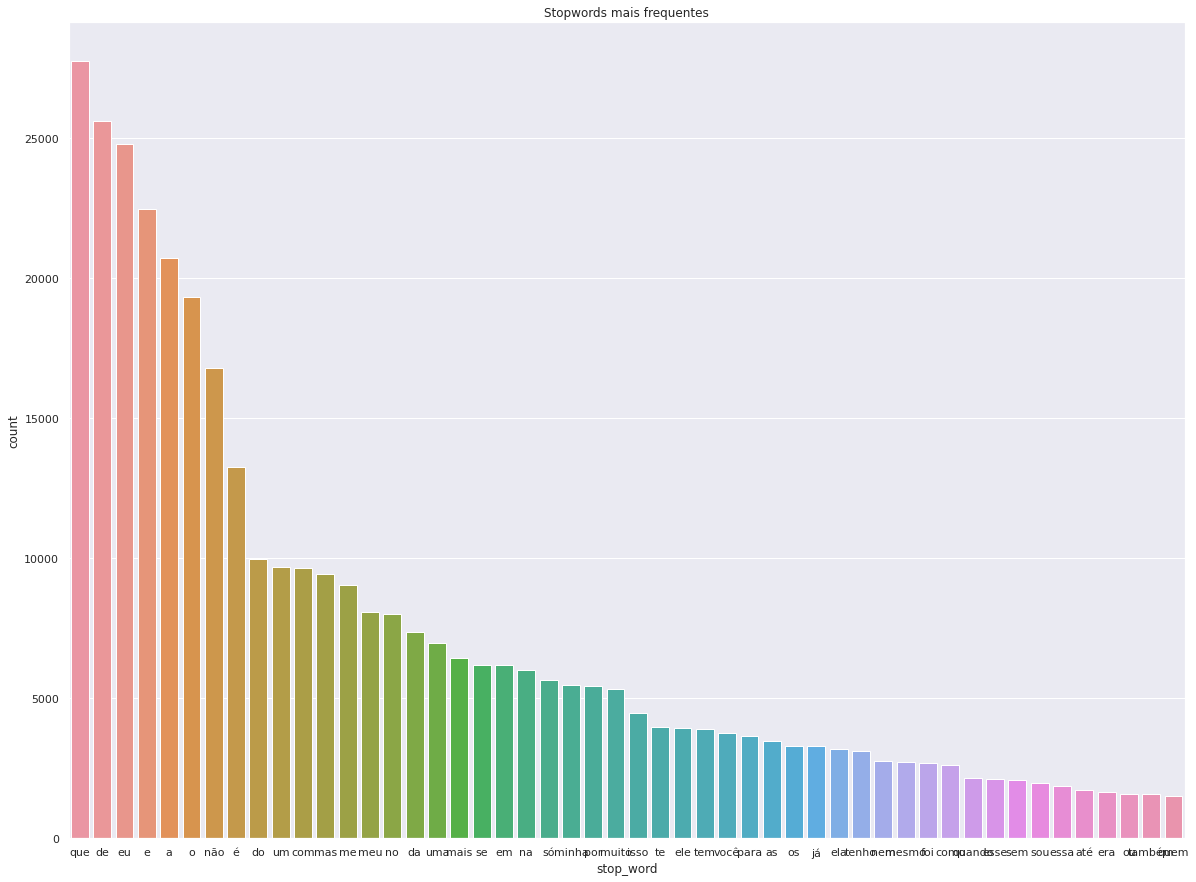

In [24]:
from collections import defaultdict

dic = defaultdict(int)

# stopwords = nltk.corpus.stopwords.words("portuguese")

print("analyzed stopwords:\n", stopwords)


for word in (all_text).split():
    if word in stopwords:
        dic[word] += 1


top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:50]  # top 50 stopwords


stopwords_df = pd.DataFrame(top, columns=["stop_word", "count"])


sns.set(rc={"figure.figsize": (20, 15)})
sns.barplot(x="stop_word", y="count", data=stopwords_df)
plt.title("Stopwords mais frequentes")
plt.show()

## O nltk considera como stop words algumas palavras que podem conter cunho sentimental, por conta disso essas palavras serão removidas desse vetor.

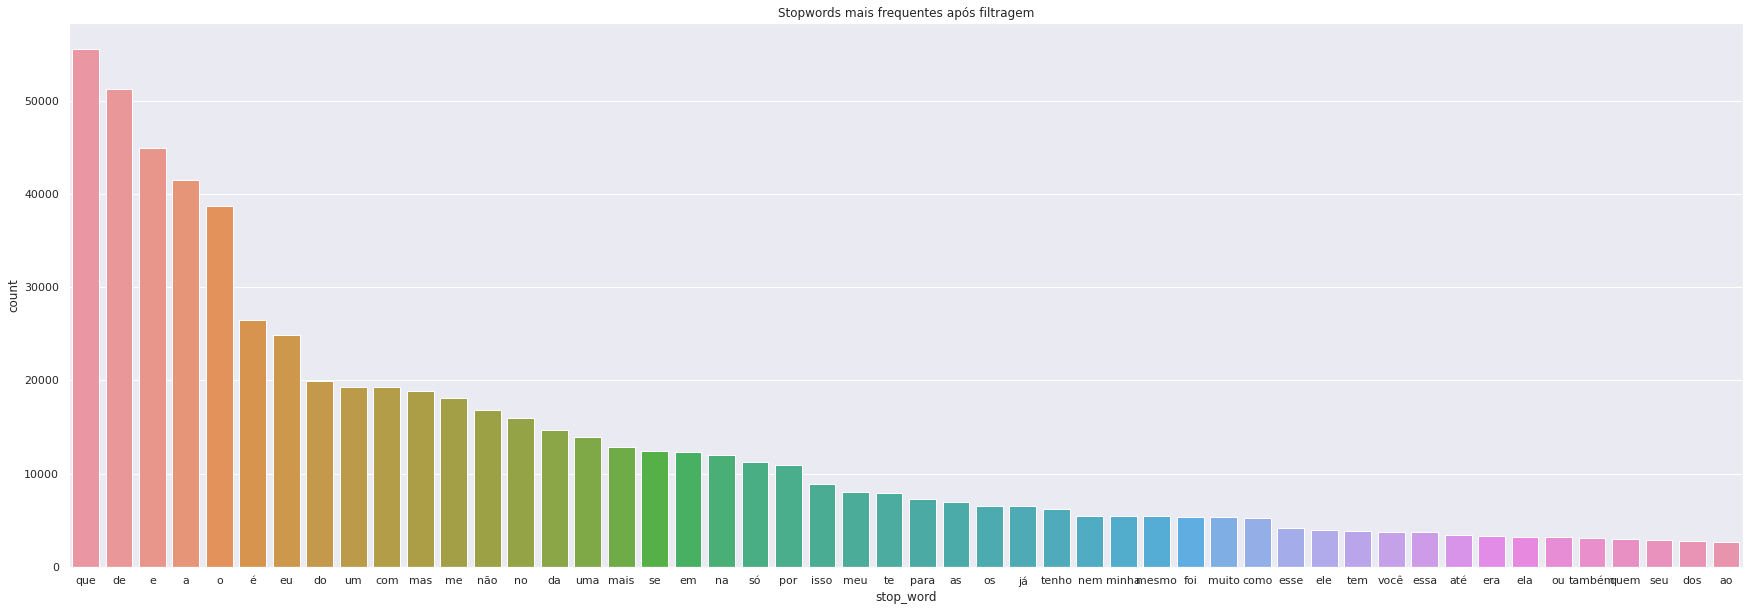

In [25]:
relevant_stop_words = [
    "eu",
    "não",
    "meu",
    "minha",
    "muito",
    "você",
    "tem",
    "ele",
    "ela",
    "quando",
    "sou",
    "você",
    "sem",
    "estou",
]  # stopwords consideradas relevantes para análise de sentimento, serão mantinidas em todo o processo de análise
stopwords = list(
    filter(lambda x: x not in relevant_stop_words, stopwords)
)  # remove do conjunto de stopwords palavras que não serão consideradas para filtragem

for word in all_text.split():
    if word in stopwords:
        dic[word] += 1

top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:50]  # top 50 stopwords


stopwords_df = pd.DataFrame(top, columns=["stop_word", "count"])


sns.set(rc={"figure.figsize": (30, 10)})
sns.barplot(x="stop_word", y="count", data=stopwords_df)
plt.title("Stopwords mais frequentes após filtragem")
plt.show()

## Análise das palavras mais frequentes que não são stop words.

#### Nota-se que há várias expressões e abreviações comuns  na internet e na língua portuguesa.

[('que', 27760), ('de', 25611), ('eu', 24814), ('e', 22476), ('a', 20741), ('o', 19327), ('não', 16796), ('é', 13242), ('do', 9958), ('um', 9663), ('com', 9646), ('pra', 9463), ('mas', 9436), ('me', 9047), ('meu', 8074), ('no', 7989), ('da', 7360), ('uma', 6975), ('mais', 6414), ('q', 6376), ('se', 6186), ('em', 6165), ('na', 6008), ('só', 5638), ('minha', 5451), ('por', 5436), ('muito', 5337), ('queria', 4724), ('to', 4510), ('isso', 4450), ('vou', 4266), ('—', 4218), ('Eu', 3973), ('te', 3955), ('ele', 3921), ('tem', 3879), ('vai', 3840), ('você', 3758), ('para', 3629), ('vc', 3511), ('bem', 3460), ('as', 3450), ('n', 3417), ('ter', 3388), ('ser', 3307), ('os', 3285), ('já', 3284), ('D', 3264), ('dia', 3231), ('pq', 3224), ('ela', 3168), ('tenho', 3118), ('tá', 3077), ('triste', 3049), ('tão', 2783), ('ver', 2748), ('nem', 2734), ('fazer', 2721), ('mesmo', 2715), ('foi', 2672), ('como', 2611), ('tudo', 2592), ('amo', 2578), ('agora', 2549), ('gente', 2521), ('nao', 2511), ('aqui', 24

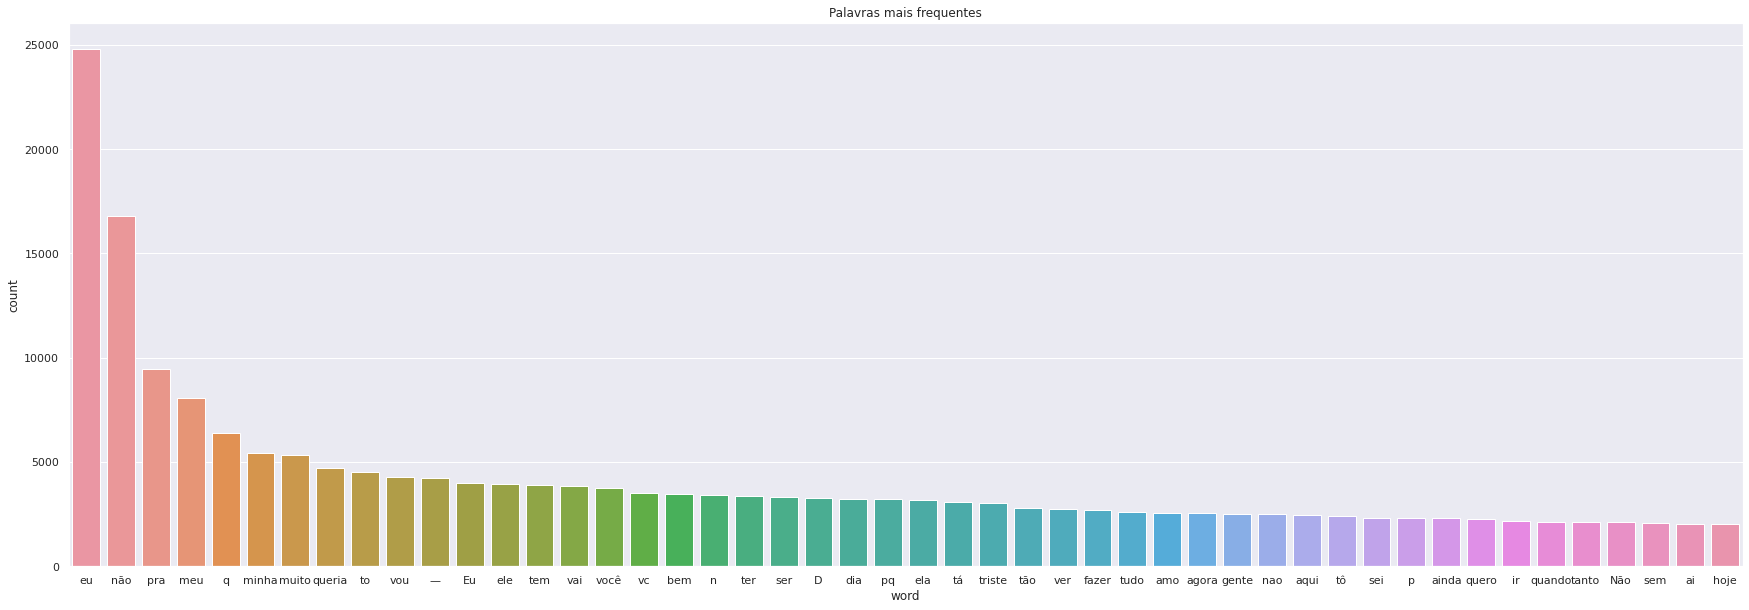

In [26]:
from collections import Counter


counter = Counter(all_text.split())
most = counter.most_common(80)
print(most)
print(len(most))

x, y = [], []
for word, count in most:
    if word not in stopwords:
        x.append(word)
        y.append(count)

most_common_words = list(zip(x, y))

most_common_words_df = pd.DataFrame(
    most_common_words, columns=["word", "count"]
)  # cria um dataframe com as palavras mais frequentes

sns.set(rc={"figure.figsize": (30, 10)})
sns.barplot(x="word", y="count", data=most_common_words_df)
plt.title("Palavras mais frequentes")
plt.show()

## Adiciona stopwords com palavras ou símbolos não relevantes para análise(descoberto com os gráficos anteriores).

In [27]:
invalid_terms = [
    "p",  
    "d",
    "(",
    "pra",
    "q",
    "_",
    "((",
    "pq",
    "ai",
    "D",
    "P",
]  # palavras inrelevantes para análise de sentimento, ou termos abreviados já contidos em stopwords

stopwords.extend(invalid_terms)

counter = Counter(all_text.split())
most = counter.most_common(80)
print(most)
print(len(most))

x, y = [], []
for word, count in most:
    if word not in stopwords:
        x.append(word)
        y.append(count)


most_common_words_filtered = list(zip(x, y))

most_common_words_filtered_df = pd.DataFrame(
    most_common_words_filtered, columns=["word", "count"]
);

[('que', 27760), ('de', 25611), ('eu', 24814), ('e', 22476), ('a', 20741), ('o', 19327), ('não', 16796), ('é', 13242), ('do', 9958), ('um', 9663), ('com', 9646), ('pra', 9463), ('mas', 9436), ('me', 9047), ('meu', 8074), ('no', 7989), ('da', 7360), ('uma', 6975), ('mais', 6414), ('q', 6376), ('se', 6186), ('em', 6165), ('na', 6008), ('só', 5638), ('minha', 5451), ('por', 5436), ('muito', 5337), ('queria', 4724), ('to', 4510), ('isso', 4450), ('vou', 4266), ('—', 4218), ('Eu', 3973), ('te', 3955), ('ele', 3921), ('tem', 3879), ('vai', 3840), ('você', 3758), ('para', 3629), ('vc', 3511), ('bem', 3460), ('as', 3450), ('n', 3417), ('ter', 3388), ('ser', 3307), ('os', 3285), ('já', 3284), ('D', 3264), ('dia', 3231), ('pq', 3224), ('ela', 3168), ('tenho', 3118), ('tá', 3077), ('triste', 3049), ('tão', 2783), ('ver', 2748), ('nem', 2734), ('fazer', 2721), ('mesmo', 2715), ('foi', 2672), ('como', 2611), ('tudo', 2592), ('amo', 2578), ('agora', 2549), ('gente', 2521), ('nao', 2511), ('aqui', 24

### plot das palavras mais frequentes após a filtragem

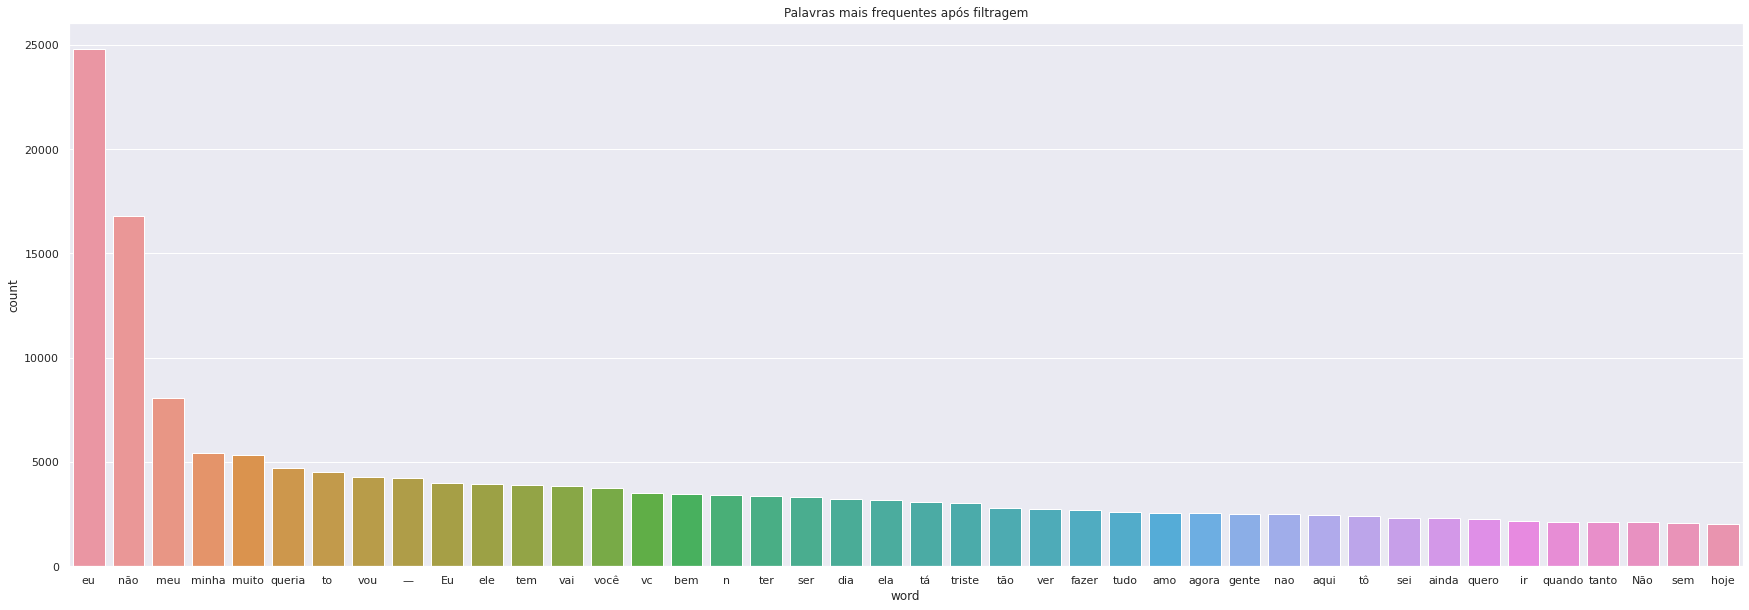

In [28]:
sns.set(rc={"figure.figsize": (30, 10)})
sns.barplot(x="word", y="count", data=most_common_words_filtered_df)
plt.title("Palavras mais frequentes após filtragem")
plt.show()

## Salvando as stopwords para serem utilizadas nos notebooks dataframe-preprocessing's

In [29]:
with open("../data/no-theme-tweets/stopwords.csv","w") as file:
    file.writelines("words\n")
    
    for word in stopwords:
        file.writelines(word);
        file.writelines("\n");
    
    file.close()

### remoção de variaveis inuteis

In [31]:
del x, y, demoji, positive_text, negative_text, all_text
del formatar_texto, df_positivo, df_negativo, df_all

<h1 style="color:red">Plots das Wordclouds</h1>

### remoção de stopwords em todos os tweets

In [32]:
no_stopwords_complete_text = df.tweet_text.apply(lambda x: remover_stop_words(x, stopwords));

In [36]:
# Selecionando os sentimentos negativos
no_stopwords_negative_text = no_stopwords_complete_text.loc[df.sentiment == "Negativo"]

In [37]:
# Selecionando os sentimentos positivos
no_stopwords_positive_text = no_stopwords_complete_text.loc[df.sentiment == "Positivo"]

## verificação da integridade dos dados

In [39]:
len(no_stopwords_complete_text) == len(no_stopwords_negative_text) + len(no_stopwords_positive_text)

True

### Aplicando o stemming 

In [41]:
stemming_complete_text = no_stopwords_complete_text.apply(lambda x: stemming(x));

In [43]:
stemming_negative_text = stemming_complete_text.loc[df.sentiment == "Negativo"];

In [44]:
stemming_positive_text = stemming_complete_text.loc[df.sentiment == "Positivo"];

<h2 style="color:red">Texto completo stemming (sem stopwords)</h2>

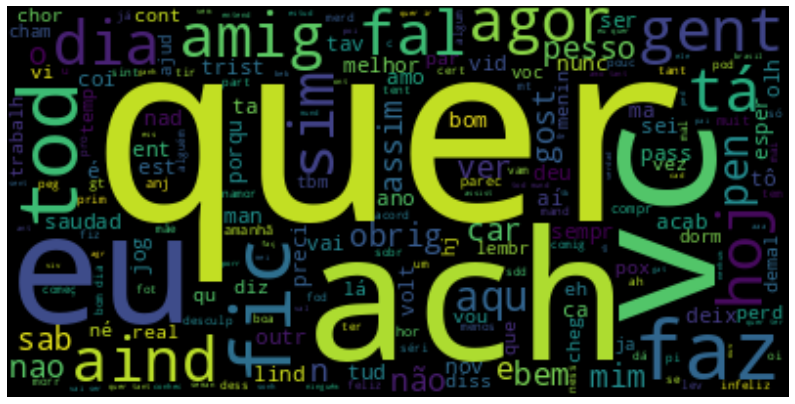

In [42]:
wordcloud = WordCloud().generate(" ".join(stemming_complete_text))
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h2 style="color:red">Texto positivo stemming (sem stopwords)</h2>

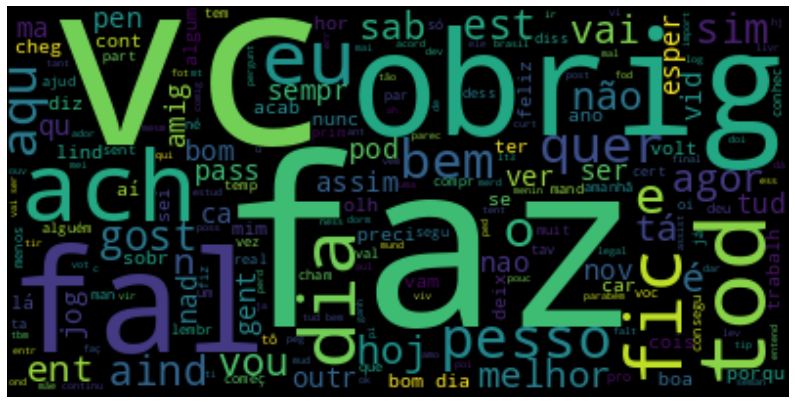

In [45]:
# Generate a word cloud image
wordcloud = WordCloud().generate(" ".join(stemming_positive_text))
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h2 style="color:red">texto negativo stemming (sem stopwords)</h2>

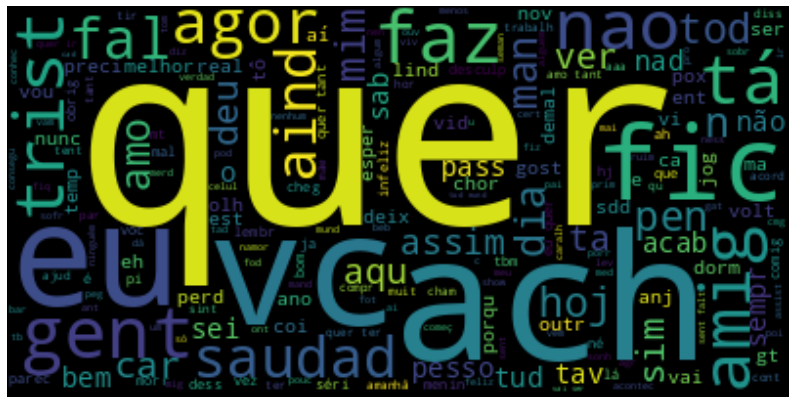

In [46]:
wordcloud = WordCloud().generate(" ".join(stemming_negative_text))
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Lematização do texto completo

In [47]:
lemmatized_complete_text = no_stopwords_complete_text.apply(lambda x: lemmatizer(x));

In [48]:
# filtrando os dados negativos
lemmatized_negative_text = no_stopwords_complete_text.loc[df.sentiment == "Negativo"]

In [49]:
# filtrando os dados positivos
lemmatized_positive_text = no_stopwords_complete_text.loc[df.sentiment == "Positivo"]

<h2 style="color:red"> Wordcloud Texto completo lemmatizado (sem stopwords)</h2>

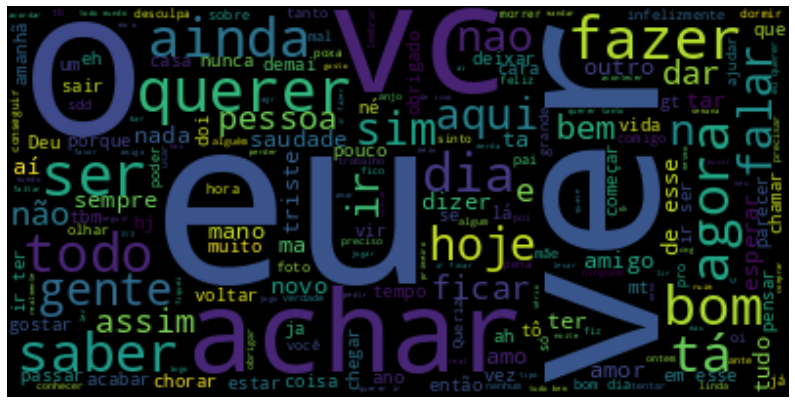

In [50]:
wordcloud = WordCloud().generate(" ".join(lemmatized_complete_text))
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h2 style="color:red"> Wordcloud Texto Positivo lemmatizado (sem stopwords)</h2>

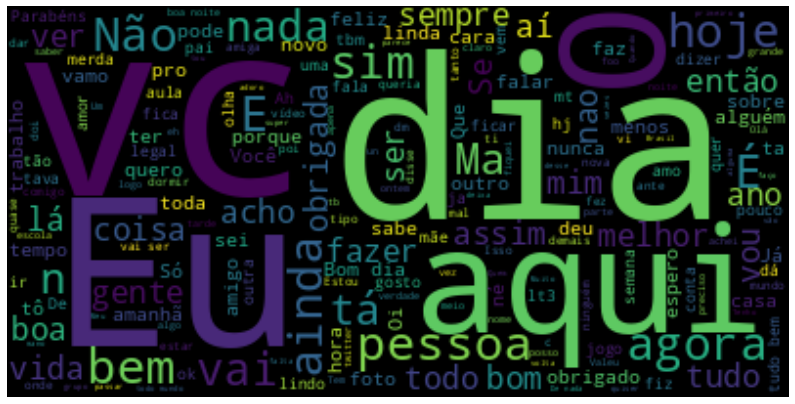

In [51]:
wordcloud = WordCloud().generate(" ".join(lemmatized_positive_text))
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h2 style="color:red"> Wordcloud Texto negativo lemmatizado (sem stopwords)</h2>

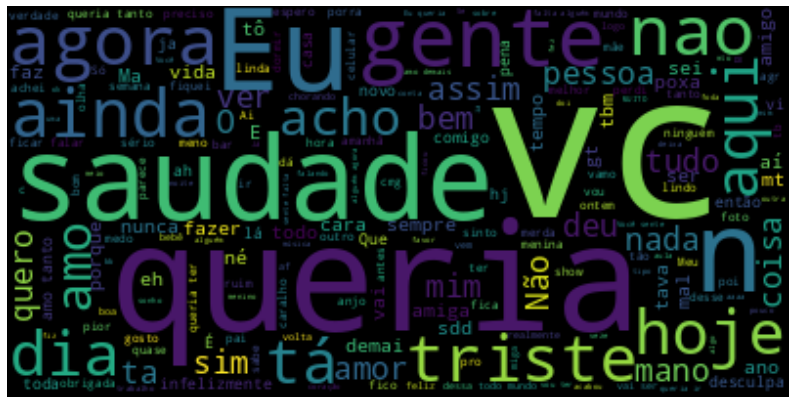

In [52]:
wordcloud = WordCloud().generate(" ".join(lemmatized_negative_text))
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()